In [2]:
print('Hello World!')

Hello World!


* по знаку звездочки в кравдатных скобках видно, что выполняется процесс [*]

In [3]:
import time
# продолжить работу через 10 секунд
time.sleep(10)

In [2]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)
say_hello('Tim')

'Hello, Tim!'

## **Библиотека `numpy`**

import numpy as np
def square(x):
    return x * x

In [42]:
x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x, y))

9 squared is 81


# Настройка

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

Здесь мы импортируем pandas для работы с нашими данными, 
* __Matplotlib__ для построения графиков и 
* __Seaborn__ для улучшения внешнего вида наших графиков. 
* Обычно также импортируется __NumPy__, но в нашем случае, мы используем его через
*  __pandas__, и нам не нужно это делать явно. 
Последняя строка не является командой Python, она является нечто, называемое строковой магией, для инструктирования Jupyter захватывать графики Matplotlib и отображать их в выходных данных ячейки; это одна из ряда расширенных функций, которые выходят за рамки данной статьи.

## Давайте продолжим и загрузим наши данные.

In [44]:
df = pd.read_csv('fortune500.csv')

# Изучение нашего набора данных

In [45]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [46]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Давайте просто переименуем эти столбцы, чтобы мы могли обратиться к ним позже.

In [47]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Далее нам нужно изучить наш набор данных. Являются ли они завершенными? Распознало ли pandas их, как ожидалось? Отсутствуют ли в них какие-либо значения?

In [48]:
len(df)

25500

У нас есть 500 строк за каждый год с 1955 по 2005 год включительно.

Давайте проверим, был ли наш набор данных импортирован, как мы ожидали. Простая проверка состоит в том, чтобы увидеть, были ли типы данных (или dtypes) правильно интерпретированы.

In [49]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Ооо Похоже, что с колонкой **profit** что-то не так – мы ожидаем, что это будет float64, как колонка **revenue**. Это указывает на то, что она, вероятно, содержит нецелые значения, так что давайте посмотрим.

* первой строкой мобрали новера тех, в которых в поле profit, преобразованно в строку - содержит символы, за исколючением минуса, точки и цифры - т.е. те которые не float64
* второй строкой, выбрали (как в массиве) location [] - из таблицы только найденные строки, и из этого КАРТЭЖА - вывели верхние строки .head()

In [50]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Как мы и подозревали! Некоторые значения являются строками, которые использовались для указания отсутствующих данных. Есть ли какие-то другие значения, которые закрались?

* - взять set - т.е. все различные значения поля profit - в тех строках, которые выбраны - строковое предствление которого не похоже на число 

In [51]:
set(df.profit[non_numberic_profits])

{'N.A.'}

Получается, что других значений нет. Это облегчает интерпретацию, но что нам делать? Это зависит от того, сколько значений пропущено.

In [52]:
len(df.profit[non_numberic_profits])

369

Это небольшая часть нашего набора данных, хотя и не совсем несущественная, поскольку все еще составляет около 1,5%. Если строки, содержащие N.A., примерно одинаково распределены по годам, самым простым решением было бы просто удалить их. Итак, давайте кратко рассмотрим их распределение.

* по полю - год, не все, а только выбранные,
* диапазон дат уже для hist - гистограммы

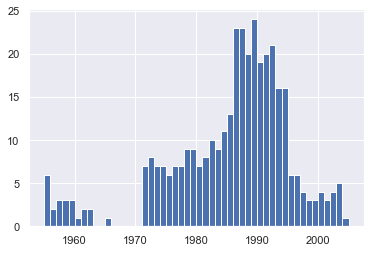

In [53]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

На первый взгляд, мы видим, что самые недопустимые значения за один год составляют менее 25, а поскольку существует 500 точек данных в год, удаление этих значений будет составлять менее 4% данных для худших лет. Действительно, кроме всплеска около 90-х годов, большинство лет имеют менее половины недостающих значений пика. Для наших целей допустим, что это приемлемо, и мы просто удалим эти строки.

* УДАЛЕНИЕ одинм знаком
* потом преобразование типа всех значений - применили функцию pandas

In [55]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

Мы должны проверить, что у нас получилось.

In [56]:
len(df)

25131

In [57]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

## Супер! Мы завершили настройку набора данных.

Если бы вы собирались представить свою записную книжку в виде отчета, вы могли бы избавиться от созданных нами исследовательских ячеек, которые включены здесь в качестве демонстрации процесса работы с записными книжками, и объединить соответствующие ячейки (см. Раздел «Дополнительные функции» ниже для подробностей об этом) для создания единой ячейки настройки набора данных. Это будет означать, что если мы когда-нибудь испортим наш набор данных в другом месте, мы сможем просто повторно запустить ячейку настройки, чтобы восстановить ее.

# Графики с matplotlib

Далее мы можем перейти к решению данного вопроса, построив график средней прибыли за год. Мы можем также рассчитать доход, поэтому сначала мы определим некоторые переменные и метод, чтобы уменьшить наш код.

* сначала подготовили дата сет - group_by_year
* выделяем три графы (год, доход, прибыль) и группируем по полю год
* вопрос - что такое двоеточие - разделитель?

In [58]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')

# mean() среднее - по индексу 0?
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

Теперь график!

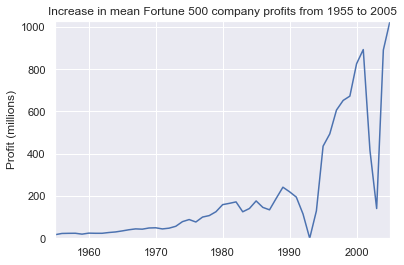

In [59]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

In [ ]:
Вау, это похоже на экспоненту, но у нее есть огромные провалы. Они должны соответствовать рецессии начала 1990-х и пузырю доткомов. Это довольно интересно увидеть в данных. Но почему прибыль возвращается к еще более высоким уровням после каждой рецессии?

Может быть, доходы могут рассказать нам больше.

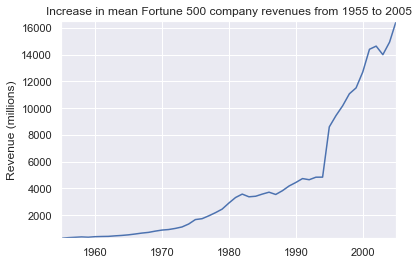

In [60]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

In [ ]:
Это добавляет другую сторону истории. Доходы отнюдь не так сильно пострадали, это отличная бухгалтерская работа для финансовых отделов.

С небольшой помощью Stack Overflow мы можем наложить эти графики с +/- их стандартными отклонениями.

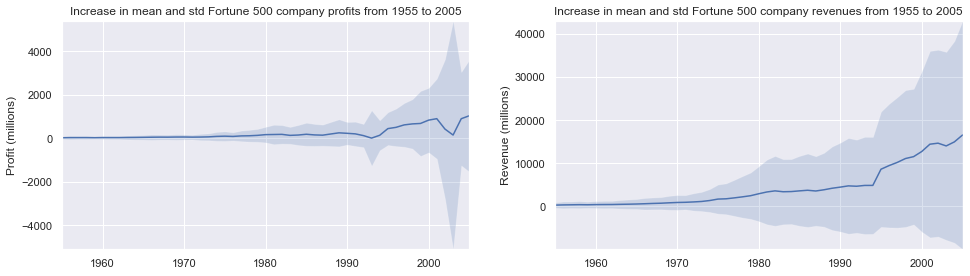

In [61]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values

plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')

fig.set_size_inches(14, 4)
fig.tight_layout()

Это ошеломляет, стандартные отклонения огромны. Некоторые компании из списка Fortune 500 зарабатывают миллиарды, в то время как другие теряют миллиарды, и риск увеличивается вместе с ростом прибыли за последние годы. Возможно, некоторые компании работают лучше, чем другие; Являются ли прибыли первых 10% более или менее волатильными, чем нижние 10%?

Есть много вопросов, которые мы могли бы рассмотреть далее, и легко увидеть, как процесс работы в блокноте соответствует собственному мыслительному процессу, поэтому сейчас пришло время подвести этот пример к концу. Этот блокнот помог нам легко исследовать наш набор данных в одном месте без переключения контекста между приложениями, и наша работа сразу становится доступной и воспроизводимой. Если бы мы хотели создать более краткий отчет для конкретной аудитории, мы могли бы быстро реорганизовать нашу работу, объединив ячейки и удалив промежуточный код.

Примечание: оригинальная версия этой статьи использовала as_matrix () вместо .values в приведенном выше фрагменте кода. На момент написания этой статьи команда .as_matrix () все еще существует, но ее планируется удалить в будущей версии pandas, поэтому мы заменили его на значение .values.

# Делимся своими ноутбуками
Когда люди говорят о совместном использовании своих ноутбуков, обычно они рассматривают две парадигмы. Чаще всего люди разделяют конечный результат своей работы, что означает обмен неинтерактивными, предварительно отрендеренными версиями своих ноутбуков; однако также существует возможность совместного использования ноутбуков с такими вспомогательными системами контроля версий, как Git.

Так же, в интернете появляются новые компании, предлагающие возможность запуска интерактивных Jupyter Notebooks в облаке.

Прежде чем поделиться
Общий блокнот будет отображаться точно в том состоянии, в котором он находился при экспорте или сохранении, включая вывод любых ячеек кода. Поэтому, чтобы обеспечить совместимость вашего ноутбука, так сказать, есть несколько шагов, которые вы должны предпринять, прежде чем им делиться:

Кликните “Cell > All Output > Clear”
Кликните “Kernel > Restart & Run All”
Дождитесь окончания выполнения ваших ячеек кода и проверьте, что они отработали так, как ожидалось.
Это гарантирует, что ваши записные книжки не будут содержать промежуточный вывод, не будут иметь устаревшее состояние и будут выполнены в порядке на момент публикации.